In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE
import numpy as np
%matplotlib inline

In [9]:
image_path = os.path.join(os.getcwd(),'dataset','image.npy')
image = np.load(image_path)
image.shape

(140000, 784)

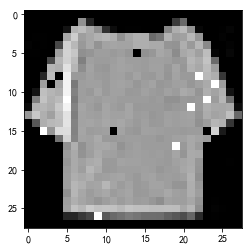

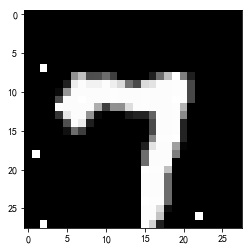

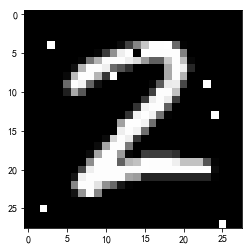

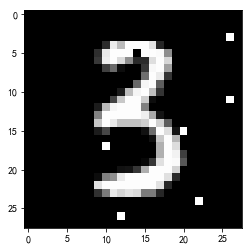

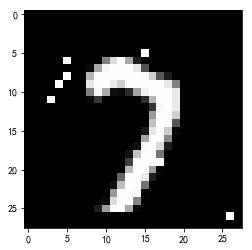

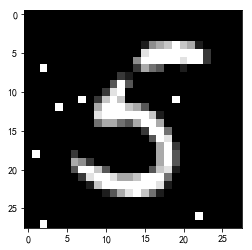

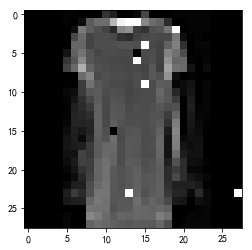

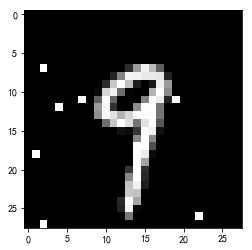

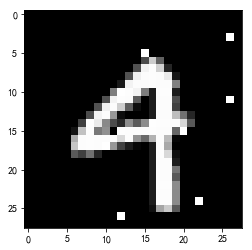

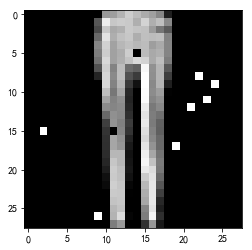

In [26]:
for i in range(10):
    img = image[i].reshape(28,28)
    plt.imshow(img,'gray')
    plt.show()

# 1. 請實作兩種不同的方法，並比較其結果。(不同的降維方法或不同的 cluster 方法都可以算是不同的方法)


# <font color=red>autoencoder + K-means</font> 

### <font color=red>autoencoder</font> 
https://blog.keras.io/building-autoencoders-in-keras.html


In [57]:
image_normalize = image.astype('float32') / 255.
image_normalize.shape

In [64]:
split_ratio = 0.2
train_num = int(image_normalize.shape[0] * (1-split_ratio))
train_num

image_train = image_normalize[:train_num]
image_test = image_normalize[train_num:]
(image_train.shape,image_test.shape)

((112000, 784), (28000, 784))

In [77]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32

# auto
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# encoder
encoder = Model(input_img, encoded)

# decoder
input_decoder = Input(shape=(encoding_dim,))
# output_decoder = Dense(784, activation='sigmoid')(input_decoder) 
output_decoder = autoencoder.layers[-1](input_decoder) 
decoder = Model(input_decoder, output_decoder)


# compile
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

encoder.summary()
decoder.summary()
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
La

In [78]:
# fit
autoencoder.fit(image_train, image_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(image_test, image_test))


Train on 112000 samples, validate on 28000 samples
Epoch 1/50
112000/112000 [==============================] - 3s 24us/step - loss: 0.4520 - val_loss: 0.3668
Epoch 2/50
112000/112000 [==============================] - 2s 18us/step - loss: 0.3487 - val_loss: 0.3347
Epoch 3/50
112000/112000 [==============================] - 2s 20us/step - loss: 0.3244 - val_loss: 0.3132
Epoch 4/50
112000/112000 [==============================] - 2s 20us/step - loss: 0.3050 - val_loss: 0.2957
Epoch 5/50
112000/112000 [==============================] - 2s 20us/step - loss: 0.2886 - val_loss: 0.2806
Epoch 6/50
112000/112000 [==============================] - 2s 19us/step - loss: 0.2752 - val_loss: 0.2691
Epoch 7/50
112000/112000 [==============================] - 2s 18us/step - loss: 0.2655 - val_loss: 0.2612
Epoch 8/50
112000/112000 [==============================] - 2s 19us/step - loss: 0.2587 - val_loss: 0.2553
Epoch 9/50
112000/112000 [==============================] - 2s 19us/step - loss: 0.2536 - val

In [79]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(image_test)
decoded_imgs = decoder.predict(encoded_imgs)

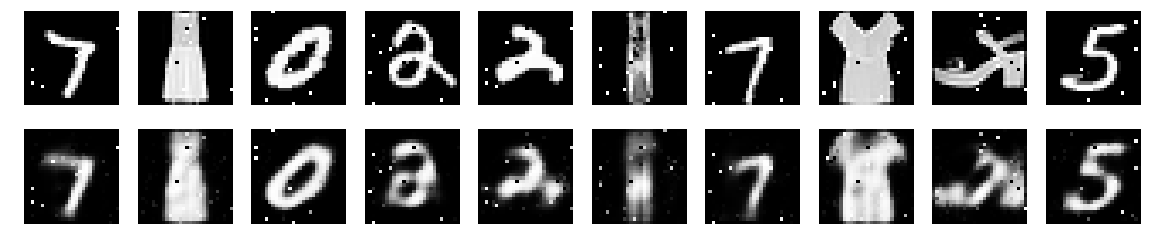

In [85]:

n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image_test[i].reshape(28, 28))
    plt.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis('off')
plt.show()

### <font color=red>K-means</font> 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [106]:
df_test_case = pd.read_csv(os.path.join(os.getcwd(),'dataset','test_case.csv')) 
df_test_case


,ID,image1_index,image2_index
0,0,17874,20452
1,1,19897,107188
2,2,68922,34890
3,3,36315,96063
4,4,62858,20570
5,5,34857,103021
6,6,95637,11993
7,7,42482,127374
8,8,64230,13878
9,9,20777,80492


In [107]:
df_sample_submission = pd.read_csv(os.path.join(os.getcwd(),'dataset','sample_submission.csv')) 
df_sample_submission

,ID,Ans
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [135]:

encoded_imgs_normalize_cluster = encoder.predict(image_normalize)
image_normalize.shape,encoded_imgs_normalize_cluster.shape

((140000, 784), (140000, 32))

In [128]:
encoded_imgs_cluster = encoder.predict(image)
image.shape,encoded_imgs_cluster.shape

((140000, 784), (140000, 32))

In [136]:
from sklearn.cluster import KMeans
kmenas_autoencoder = KMeans(n_clusters=2).fit(encoded_imgs_normalize_cluster)

In [137]:
kmenas_autoencoder.labels_.shape

(140000,)

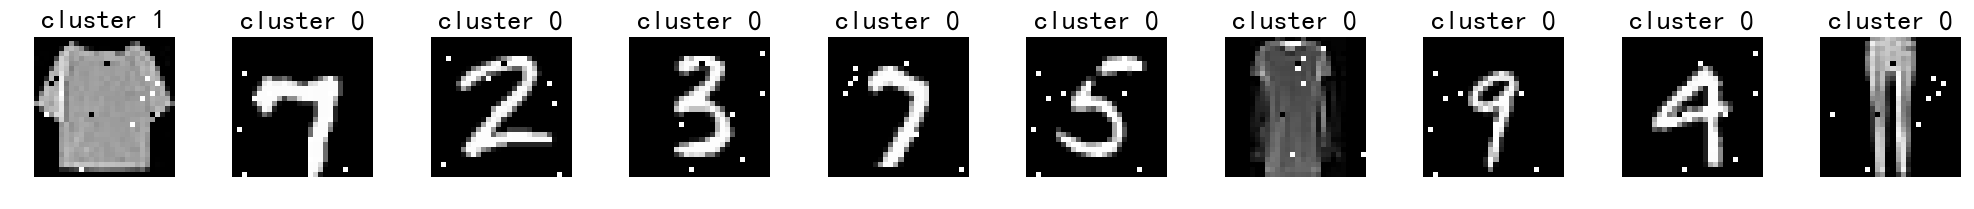

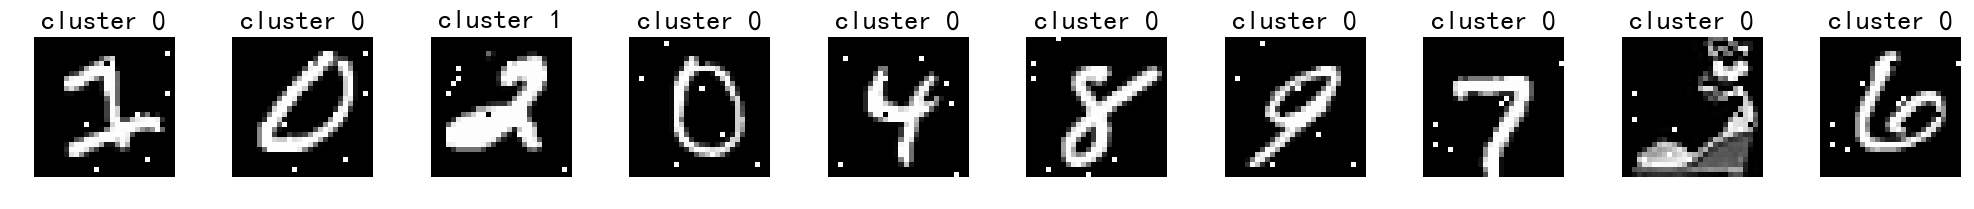

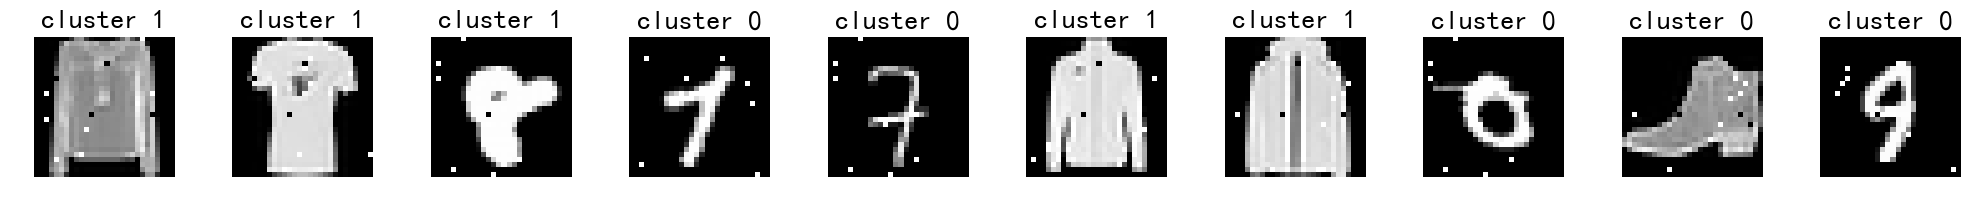

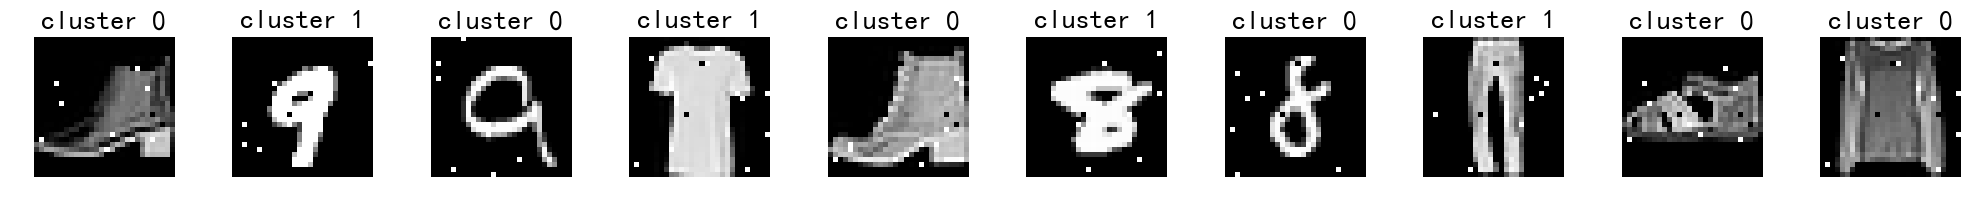

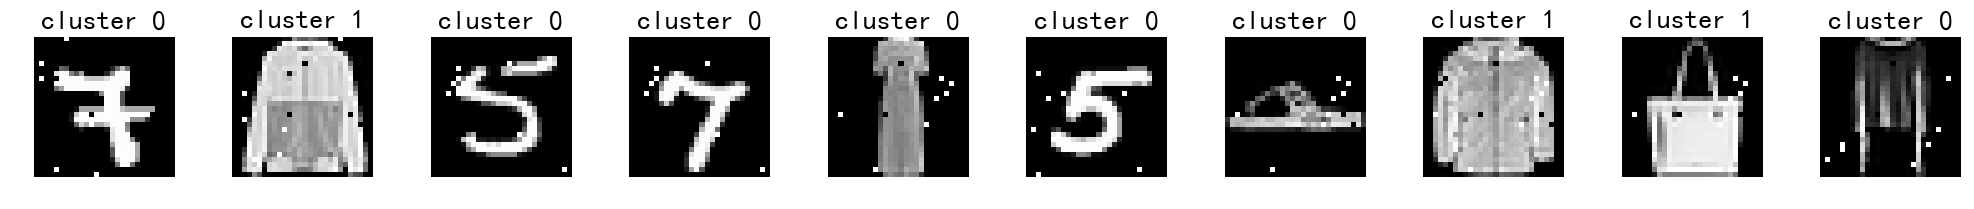

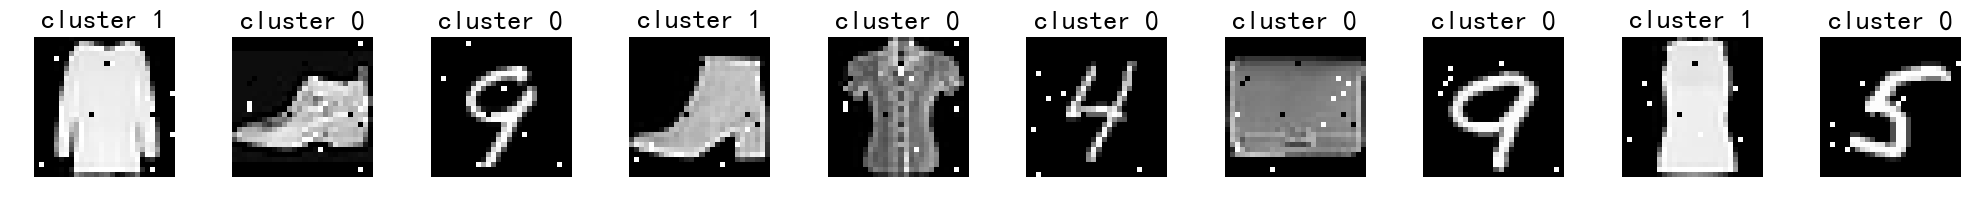

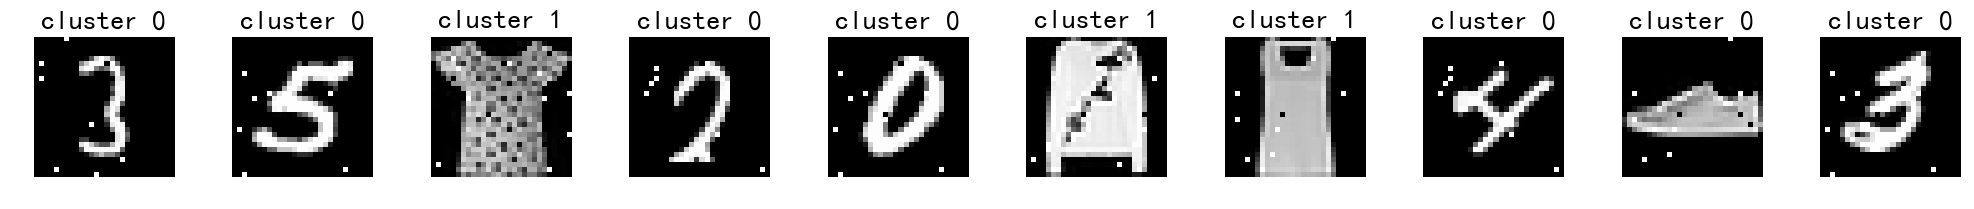

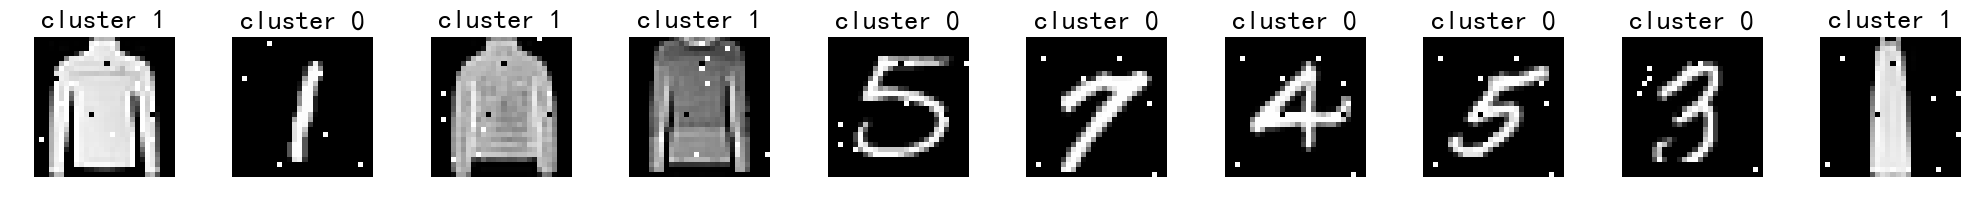

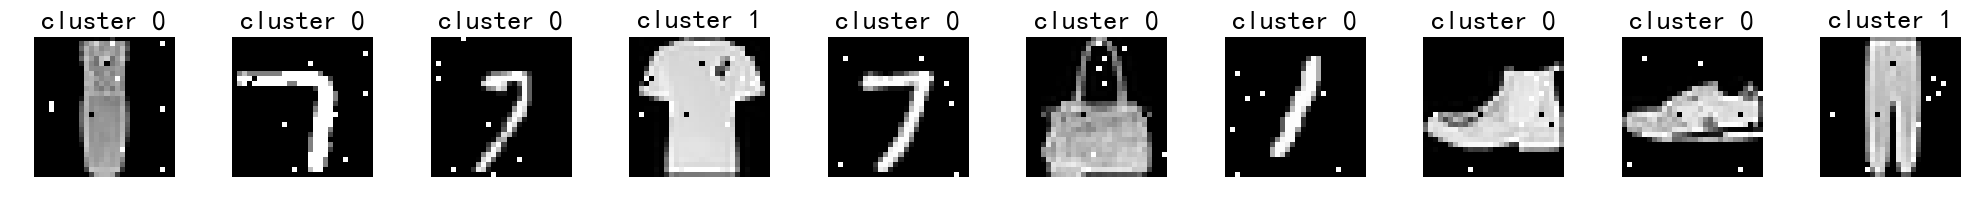

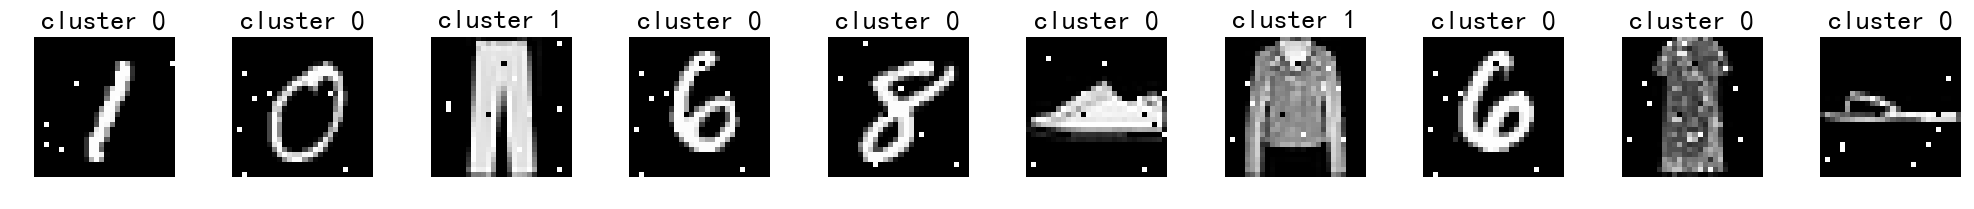

In [164]:
nrow = 1 
ncol = 10
width = 2*ncol
height = 2*nrow


for i in range(100):
    
    i_plot = i%10 +1
    
    if i_plot == 1:
        plt.figure(figsize=(width, height),dpi= 100)
    
    plt.subplot(nrow,ncol,i_plot)
    plt.imshow(image_normalize[i].reshape(28,28))
    plt.title('cluster %s'%(kmenas_autoencoder.labels_[i]), fontsize=20)
    plt.axis('off')
    
    if i_plot == 10:
        plt.tight_layout()
        plt.show()


In [124]:
# from sklearn.cluster import KMeans
# import numpy as np
# X = np.array([[1, 2], [1, 4], [1, 0],
#               [10, 2], [10, 4], [10, 0]])
# kmeans = KMeans(n_clusters=2).fit(X)
# kmeans.predict([[0, 0], [12, 3]])
# kmeans.cluster_centers_



# <font color=green>pca + k-means</font> 

### <font color=green>pca</font> 

In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
pca_imgs_normalize_cluster = pca.fit_transform(image_normalize)

In [142]:
pca_inverse_imgs = pca.inverse_transform(pca_imgs_normalize_cluster)

In [143]:
image_normalize.shape,pca_imgs_normalize_cluster.shape,pca_inverse_imgs.shape

((140000, 784), (140000, 32), (140000, 784))

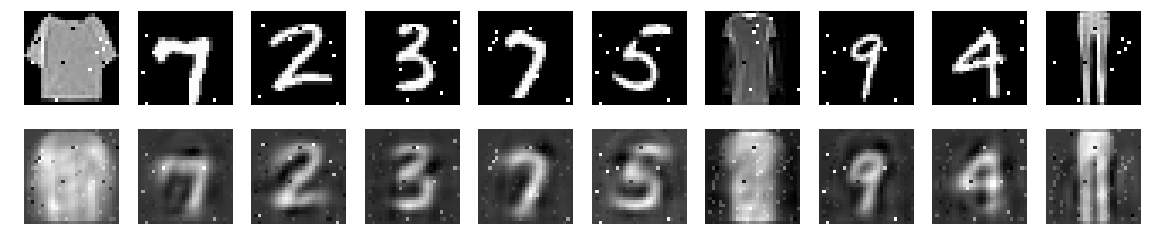

In [144]:
n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image_normalize[i].reshape(28, 28))
    plt.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pca_inverse_imgs[i].reshape(28, 28))
    plt.axis('off')
plt.show()

### <font color=green>k-means</font> 

In [145]:
kmenas_pca = KMeans(n_clusters=2).fit(pca_imgs_normalize_cluster)
kmenas_pca.labels_.shape

(140000,)

In [148]:
11%10

1

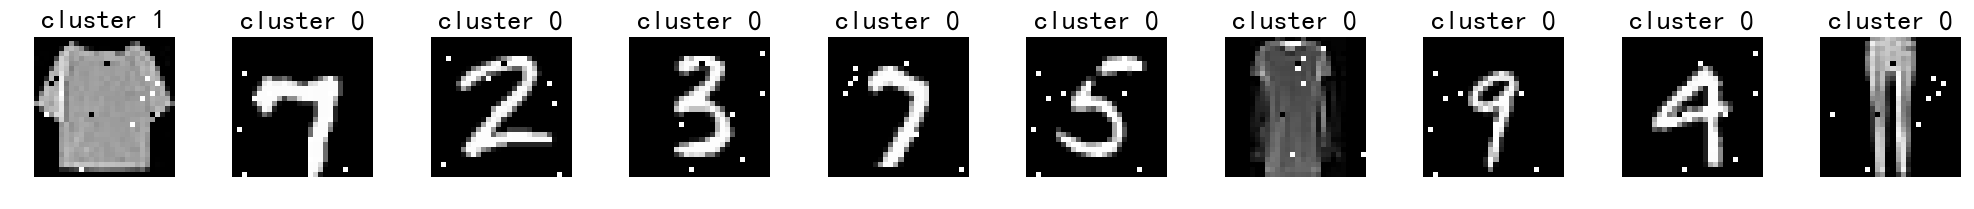

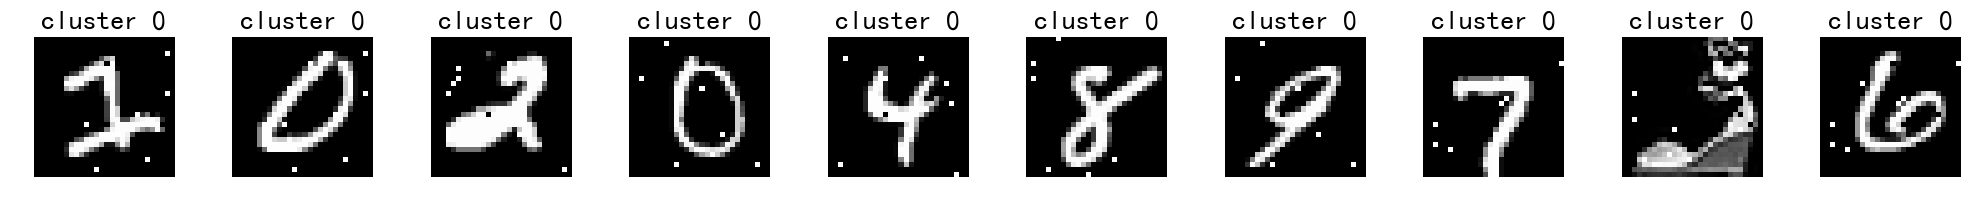

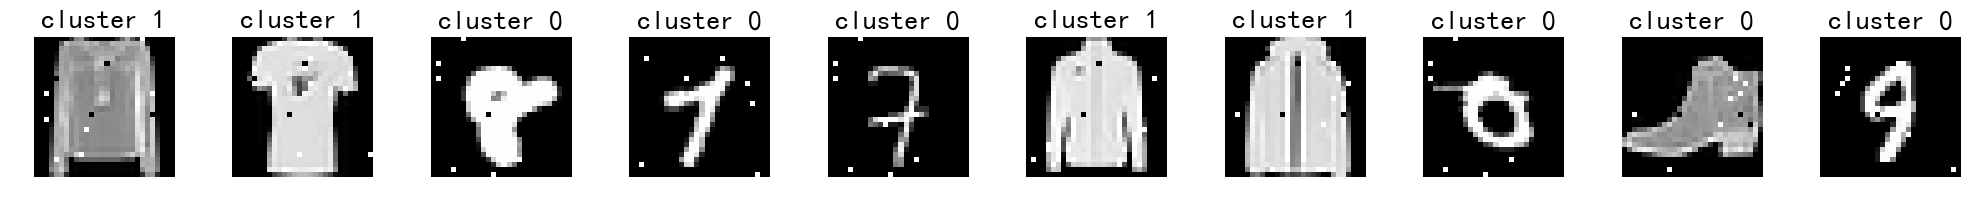

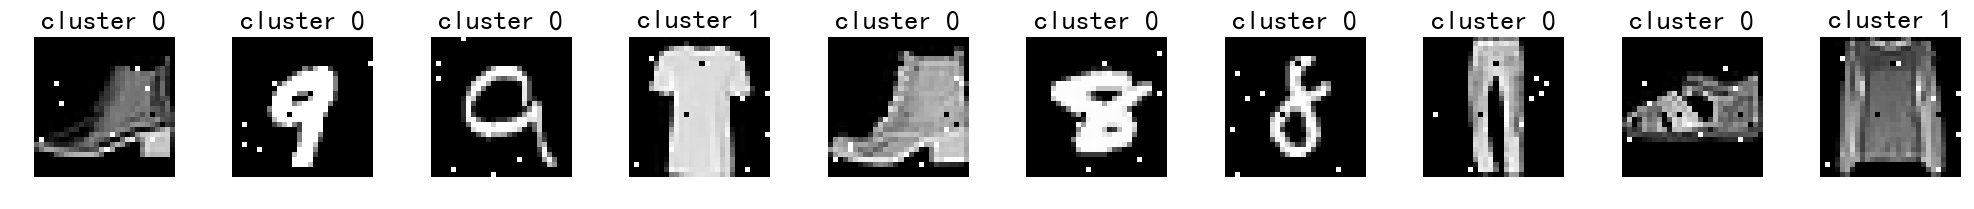

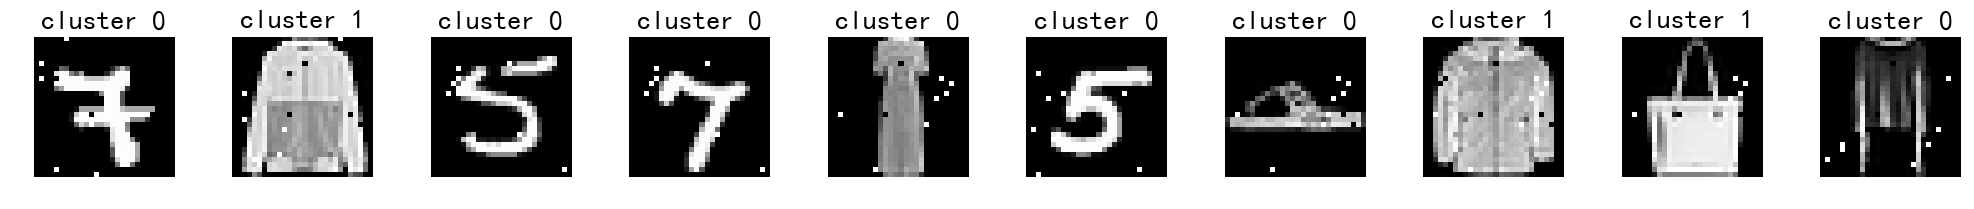

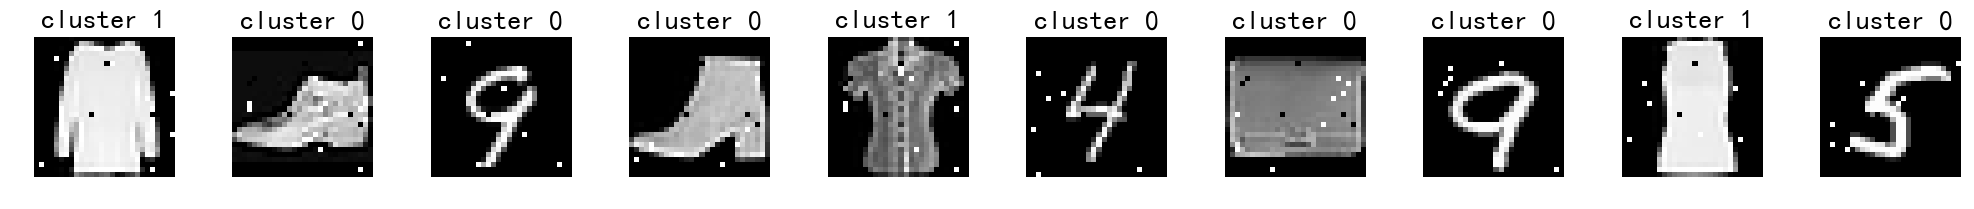

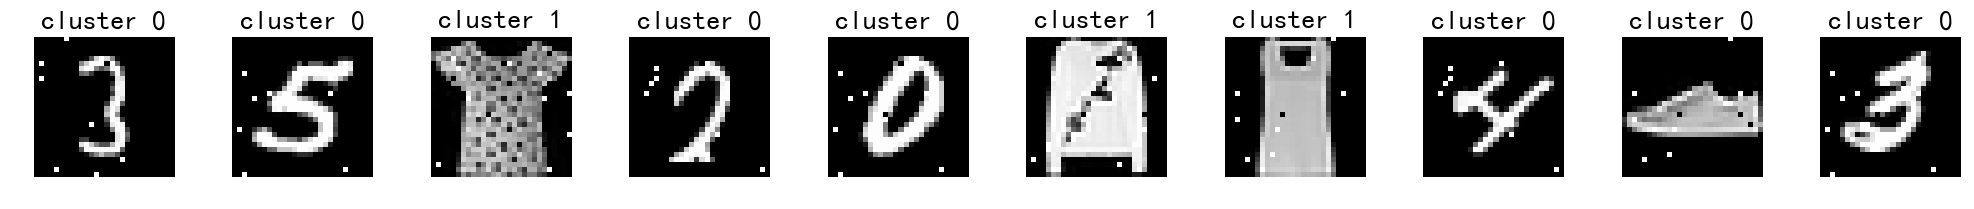

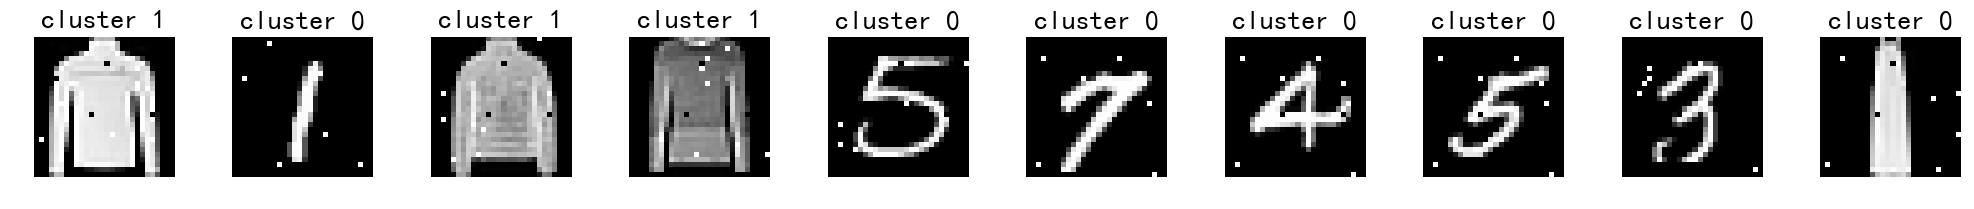

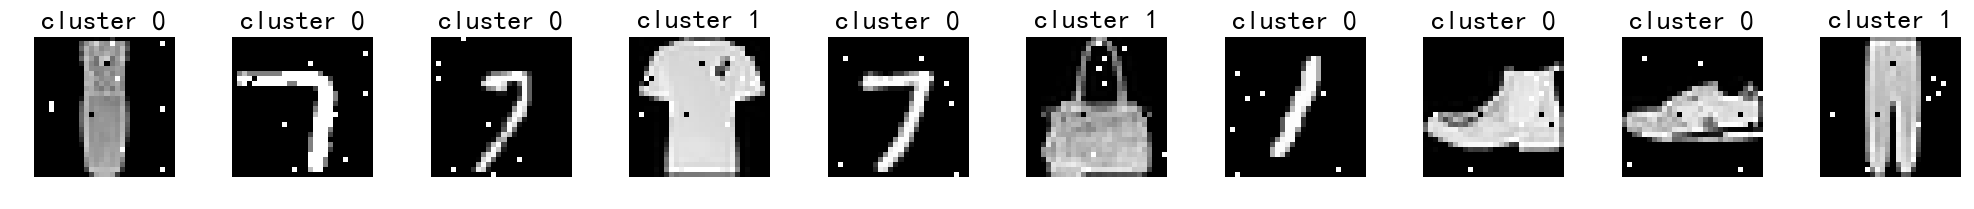

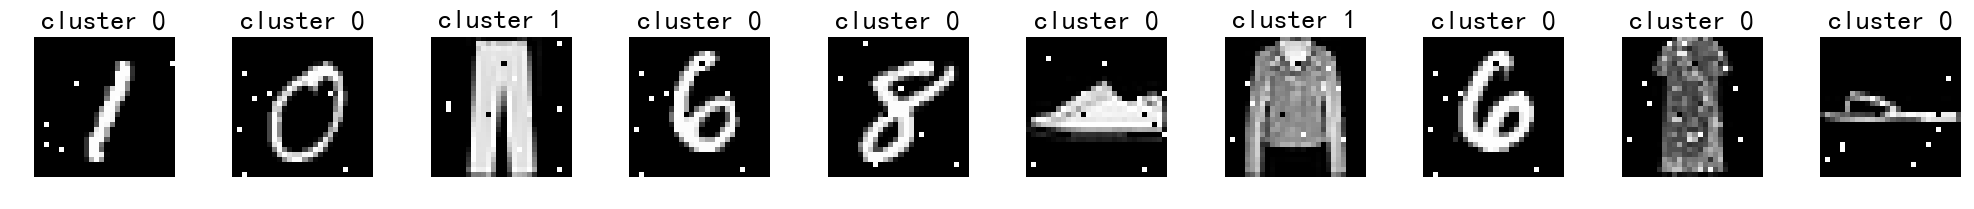

In [163]:
nrow = 1 
ncol = 10
width = 2*ncol
height = 2*nrow


for i in range(100):
    
    i_plot = i%10 +1
    
    if i_plot == 1:
        plt.figure(figsize=(width, height),dpi= 100)
    
    plt.subplot(nrow,ncol,i_plot)
    plt.imshow(image_normalize[i].reshape(28,28))
    plt.title('cluster %s'%(kmenas_pca.labels_[i]), fontsize=20)
    plt.axis('off')
    
    if i_plot == 10:
        plt.tight_layout()
        plt.show()


# 2. 預測 visualization.npy 中的 label，在二維平面上視覺化 label 的分佈。(用 PCA, t-SNE 等工具把你抽出來的 feature 投影到二維，或簡單的取 feature 的前兩維)



In [165]:
visualization_path = os.path.join(os.getcwd(),'dataset','visualization.npy')
visualization = np.load(visualization_path)
visualization.shape

(10000, 784)

In [169]:
visualization_normalize = visualization.astype('float32') / 255.
visualization_normalize.shape

(10000, 784)

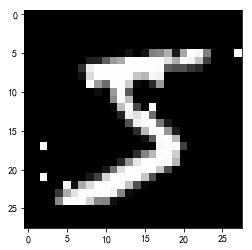

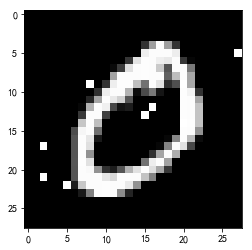

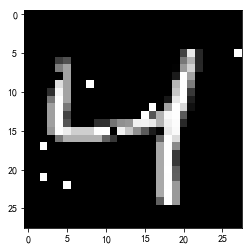

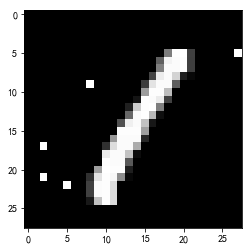

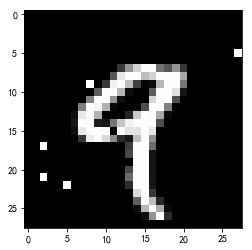

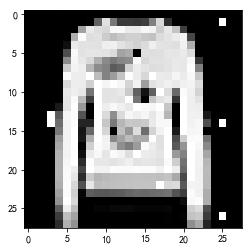

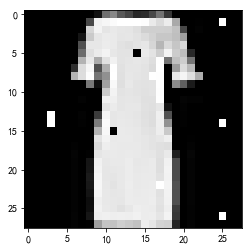

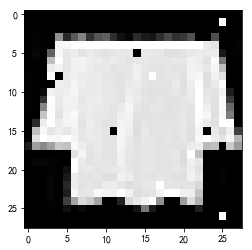

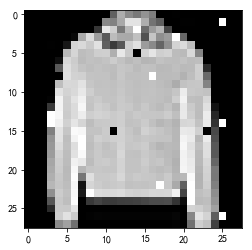

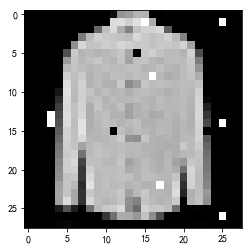

In [170]:
for i in [0,1,2,3,4,5000,5001,5002,5003,5004]:
    vis = visualization_normalize[i].reshape(28,28)
    plt.imshow(vis,'gray')
    plt.show()

In [218]:
encoder_vis_norm = encoder.predict(visualization_normalize)
encoder_vis_norm.shape,visualization_normalize.shape

((10000, 32), (10000, 784))

In [219]:
predict_label=kmenas_autoencoder.predict(encoder_vis_norm)
predict_label.shape

(10000,)

In [176]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_results = tsne.fit_transform(visualization_normalize)
tsne_results.shape

(10000, 2)

http://www.learningaboutelectronics.com/Articles/How-to-create-a-scatter-plot-in-matplotlib-with-Python.php

In [220]:
x = tsne_results[:,0]
y = tsne_results[:,1]
label = predict_label
x.shape,y.shape,label.shape

((10000,), (10000,), (10000,))

In [221]:
df_vis = pd.DataFrame({'predict_label': label})
df_vis['real_label'] = [0 if i < 5000 else 1 for i in range(10000) ]
df_vis['tsne_x'] = tsne_results[:,0]
df_vis['tsne_y'] = tsne_results[:,1]
df_vis

,predict_label,real_label,tsne_x,tsne_y
0,0,0,-35.410637,-7.869053
1,0,0,-58.529701,19.780062
2,0,0,6.584285,-7.635465
3,0,0,-23.792965,-71.079323
4,0,0,-0.037221,-34.440338
5,0,0,-63.054672,-57.431549
6,0,0,-23.902077,-32.121101
7,0,0,-64.103127,-17.953882
8,0,0,-21.216206,-35.956161
9,0,0,18.126083,-45.453053


In [222]:
plt.rcParams['axes.unicode_minus'] = False 

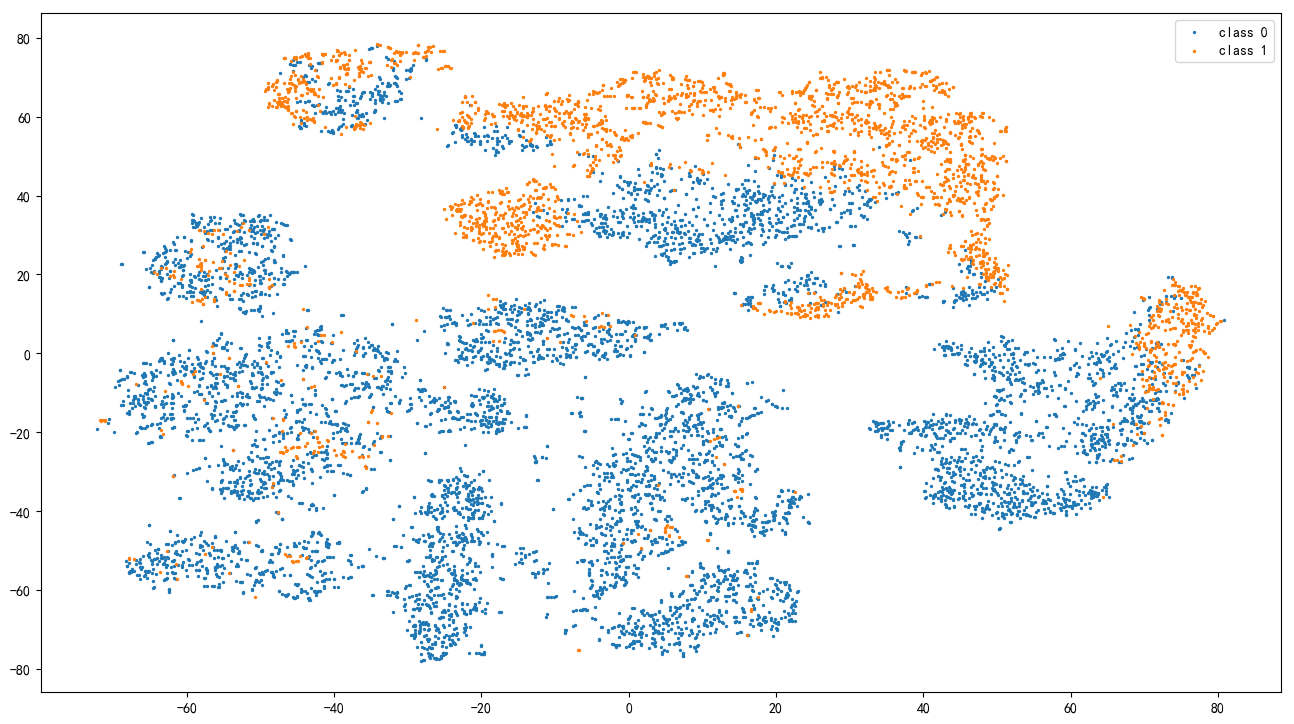

In [223]:
plt.figure(figsize=(16, 9),dpi= 100)

df_class_0 = df_vis[df_vis.predict_label==0]
df_class_1 = df_vis[df_vis.predict_label==1]

plt.scatter(df_class_0.tsne_x, df_class_0.tsne_y, label='class 0', s=2)
plt.scatter(df_class_1.tsne_x, df_class_1.tsne_y, label='class 1', s=2)

plt.legend()
plt.show()

https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter

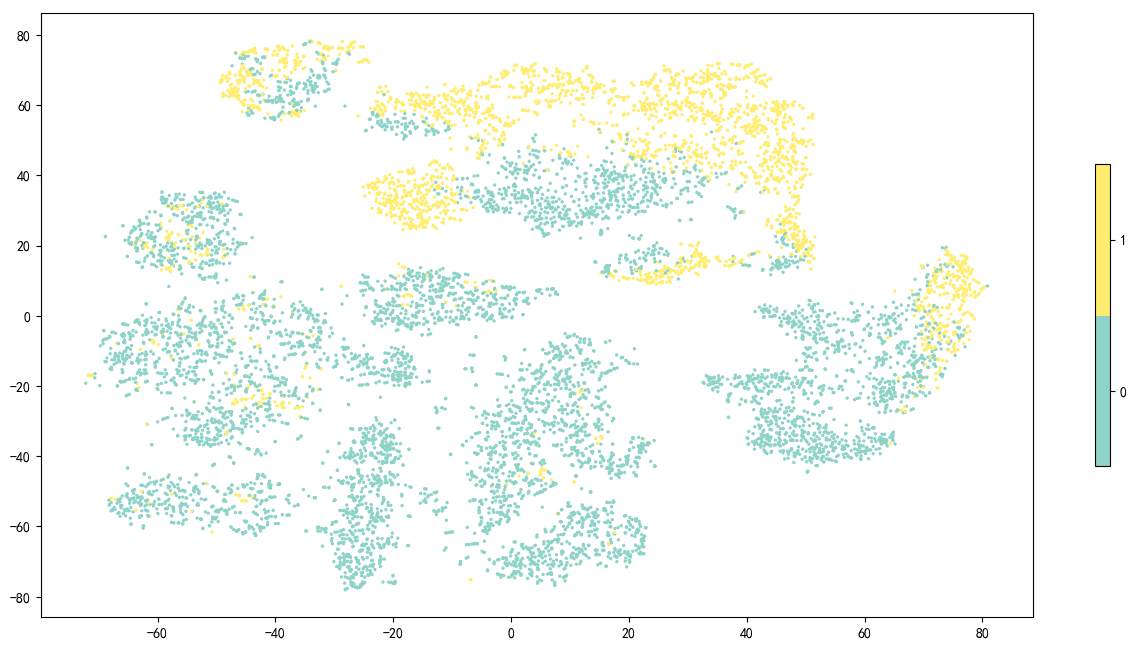

In [245]:
plt.figure(figsize=(16, 9),dpi= 100)

cmap = plt.cm.get_cmap("Set3", 2)

x=df_vis['tsne_x']
y=df_vis['tsne_y']
z=df_vis['predict_label']

sc = plt.scatter(x, y, c=z, cmap=cmap, s=2)

plt.colorbar(ticks=range(2),shrink=0.5)
plt.clim(-0.5, 1.5)

plt.show()

# 3. visualization.npy 中前 5000 個 images 來自 dataset A，後 5000 個 images 來自 dataset B。請根據這個資訊，在二維平面上視覺化 label 的分佈，接著比較和自己預測的 label 之間有何不同。(visualization.npy 將在 Kaggle deadline 之後公布在 Kaggle 上)

In [262]:
def return_group(predict,real):
    if (predict,real)==(0,0): return 0
    elif (predict,real)==(1,0): return 1
    elif (predict,real)==(0,1): return 2
    elif (predict,real)==(1,1): return 3



df_vis['group'] = df_vis.apply(lambda row: return_group(row['predict_label'],row['real_label']), axis=1 )   
df_vis

,predict_label,real_label,tsne_x,tsne_y,group
0,0,0,-35.410637,-7.869053,0
1,0,0,-58.529701,19.780062,0
2,0,0,6.584285,-7.635465,0
3,0,0,-23.792965,-71.079323,0
4,0,0,-0.037221,-34.440338,0
5,0,0,-63.054672,-57.431549,0
6,0,0,-23.902077,-32.121101,0
7,0,0,-64.103127,-17.953882,0
8,0,0,-21.216206,-35.956161,0
9,0,0,18.126083,-45.453053,0


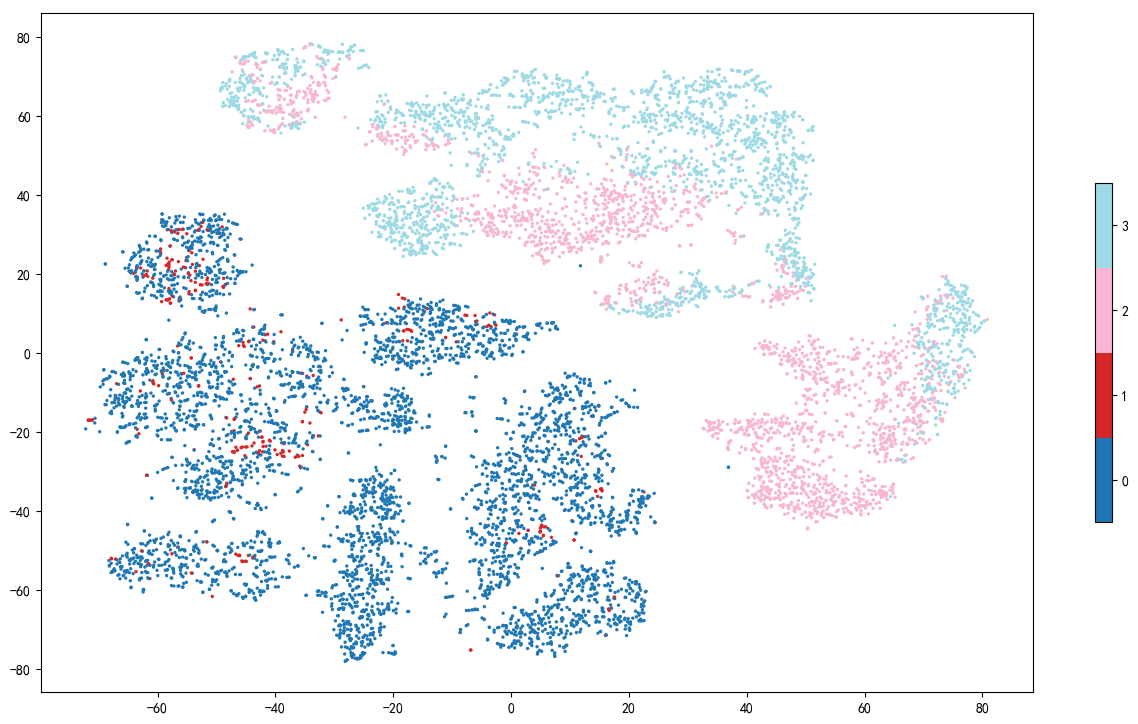

In [254]:
plt.figure(figsize=(16, 9),dpi= 100)

group_num = 4

cmap = plt.cm.get_cmap("tab20", group_num)

x=df_vis['tsne_x']
y=df_vis['tsne_y']
z=df_vis['group']

sc = plt.scatter(x, y, c=z, cmap=cmap, s=2)

plt.colorbar(ticks=range(group_num),shrink=0.5)
plt.clim(-0.5, 3.5)

plt.show()

In [263]:
from sklearn.metrics import confusion_matrix
y_true, y_pred=df_vis.real_label,df_vis.predict_label
cm = confusion_matrix(y_true, y_pred)
cm

array([[4719,  281],
       [2383, 2617]])

In [260]:
i_plot_list = range(1,101,1)
i_image_list = range(0,10000,100)
list(zip(i_plot_list,i_image_list))

[(1, 0),
 (2, 100),
 (3, 200),
 (4, 300),
 (5, 400),
 (6, 500),
 (7, 600),
 (8, 700),
 (9, 800),
 (10, 900),
 (11, 1000),
 (12, 1100),
 (13, 1200),
 (14, 1300),
 (15, 1400),
 (16, 1500),
 (17, 1600),
 (18, 1700),
 (19, 1800),
 (20, 1900),
 (21, 2000),
 (22, 2100),
 (23, 2200),
 (24, 2300),
 (25, 2400),
 (26, 2500),
 (27, 2600),
 (28, 2700),
 (29, 2800),
 (30, 2900),
 (31, 3000),
 (32, 3100),
 (33, 3200),
 (34, 3300),
 (35, 3400),
 (36, 3500),
 (37, 3600),
 (38, 3700),
 (39, 3800),
 (40, 3900),
 (41, 4000),
 (42, 4100),
 (43, 4200),
 (44, 4300),
 (45, 4400),
 (46, 4500),
 (47, 4600),
 (48, 4700),
 (49, 4800),
 (50, 4900),
 (51, 5000),
 (52, 5100),
 (53, 5200),
 (54, 5300),
 (55, 5400),
 (56, 5500),
 (57, 5600),
 (58, 5700),
 (59, 5800),
 (60, 5900),
 (61, 6000),
 (62, 6100),
 (63, 6200),
 (64, 6300),
 (65, 6400),
 (66, 6500),
 (67, 6600),
 (68, 6700),
 (69, 6800),
 (70, 6900),
 (71, 7000),
 (72, 7100),
 (73, 7200),
 (74, 7300),
 (75, 7400),
 (76, 7500),
 (77, 7600),
 (78, 7700),
 (79, 7

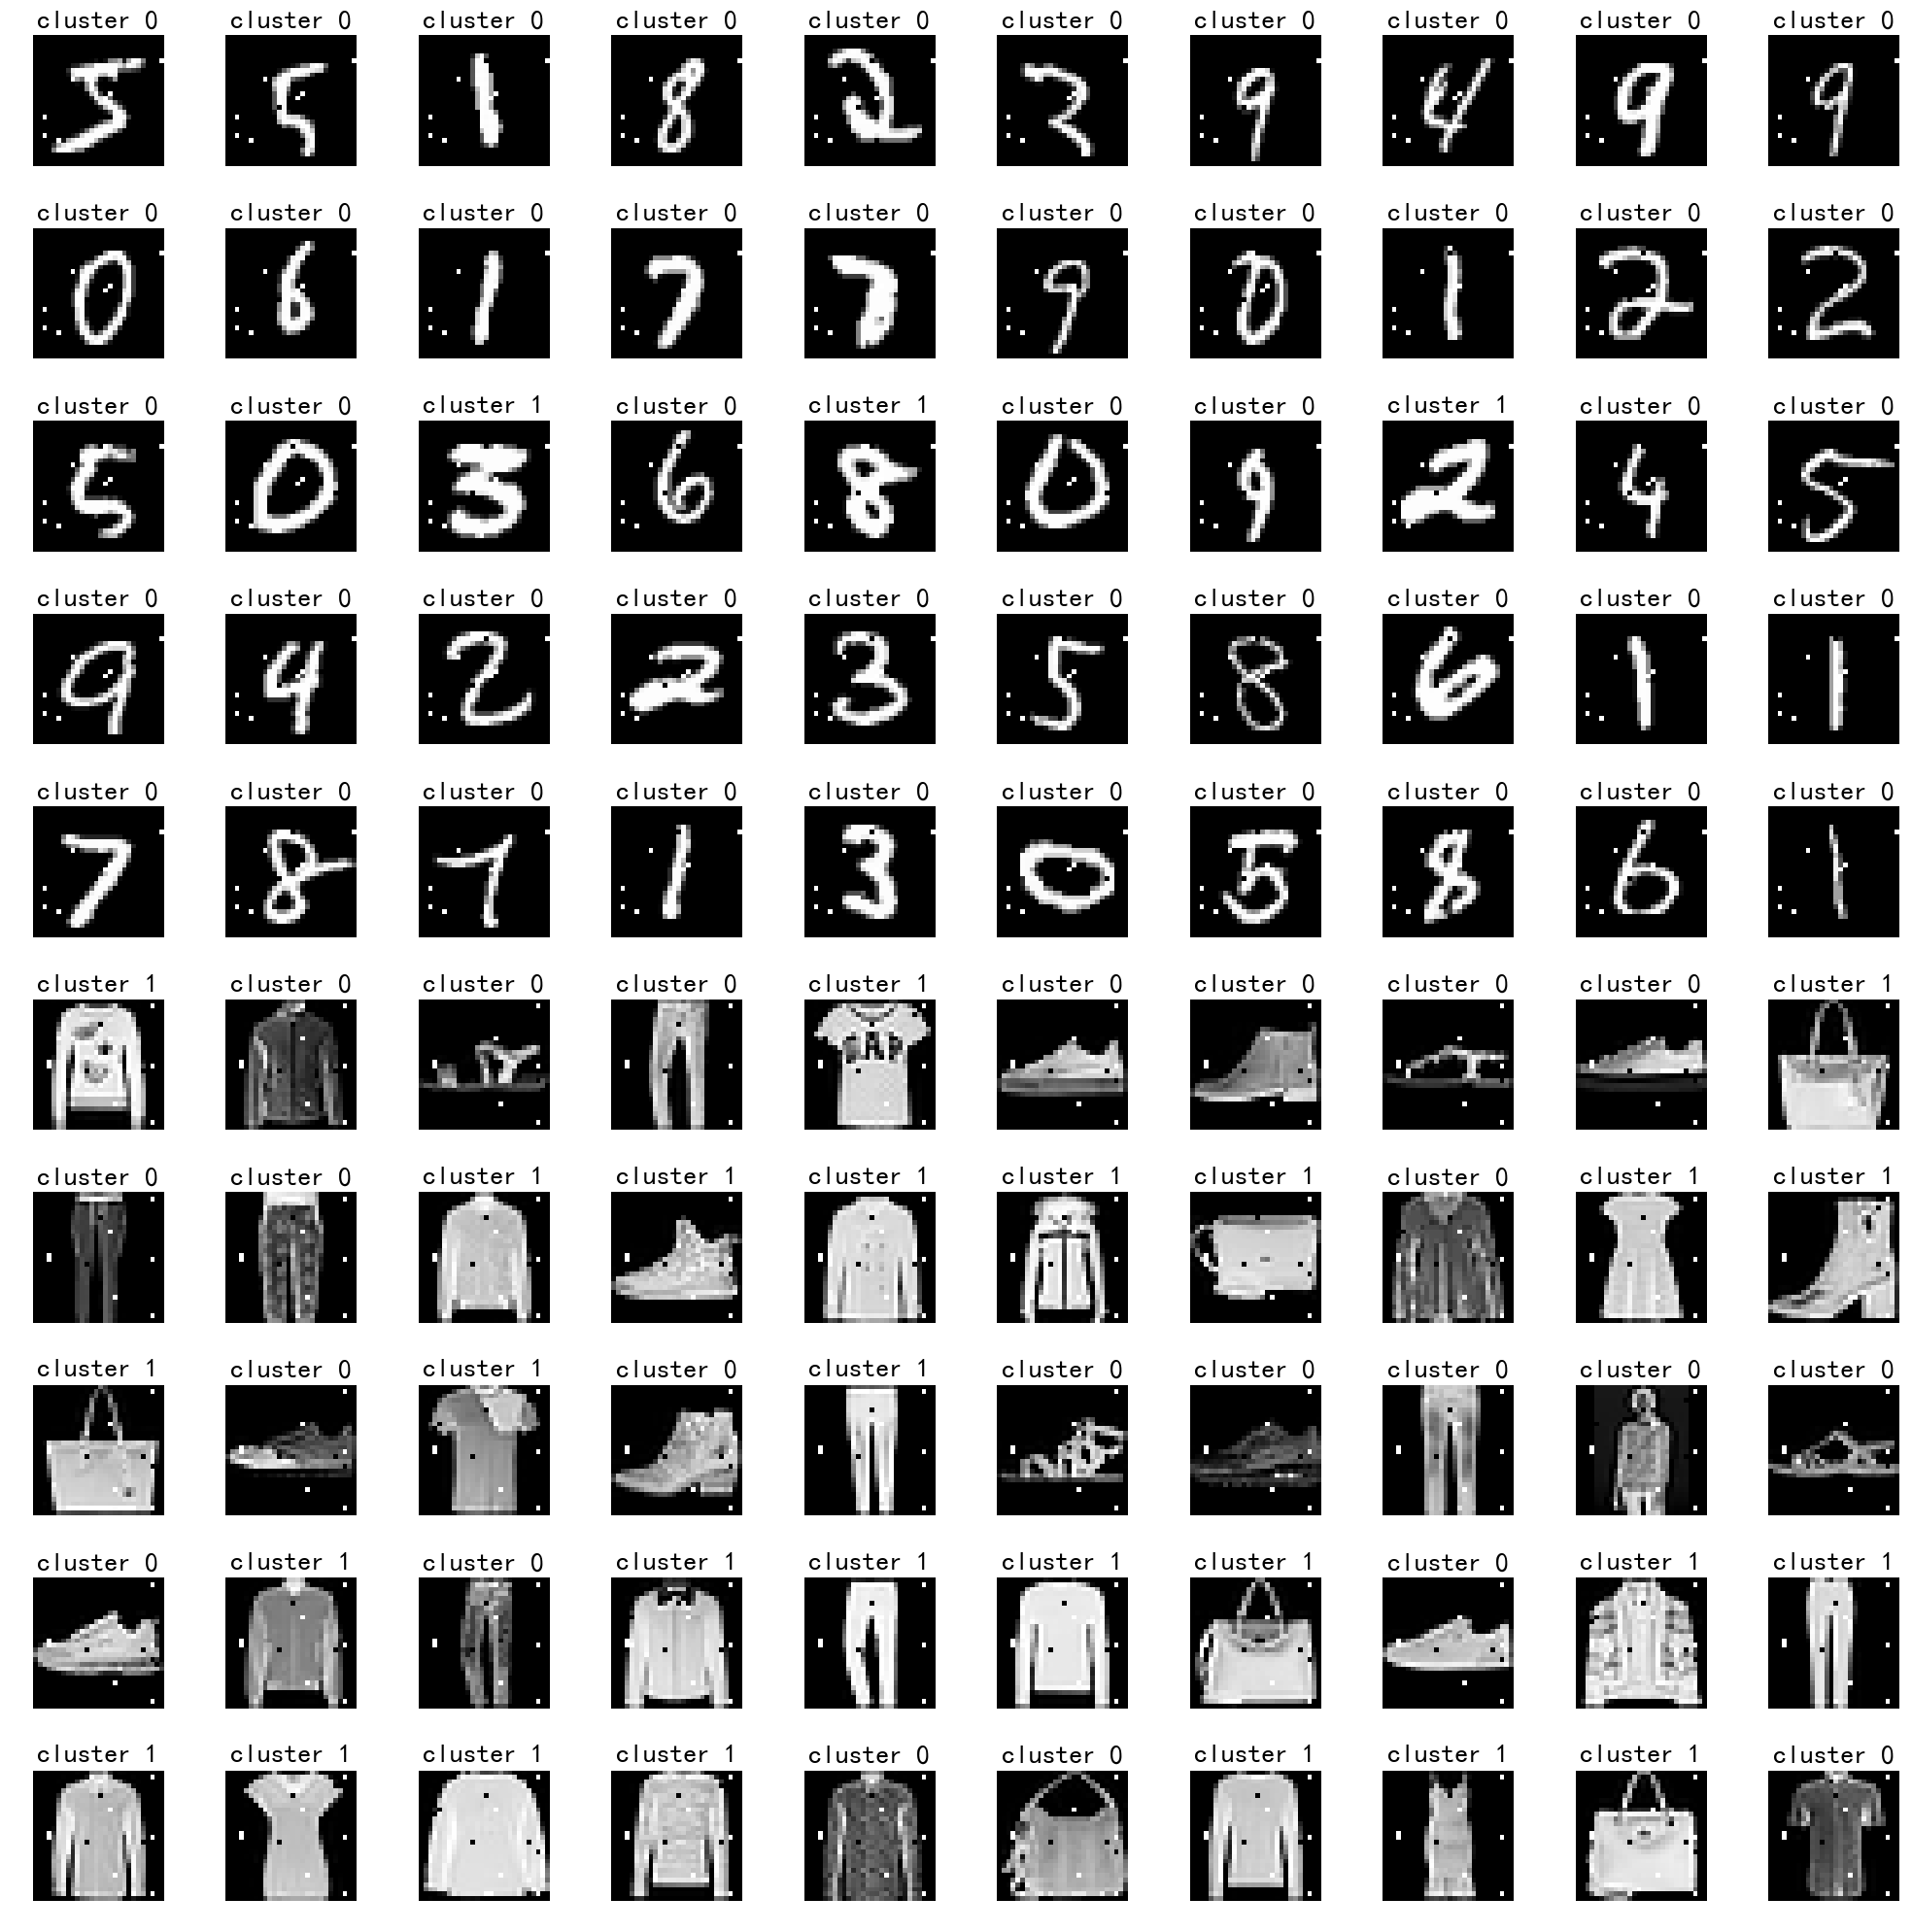

In [261]:
nrow = 10 
ncol = 10
width = 2*ncol
height = 2*nrow

plt.figure(figsize=(width, height),dpi= 100)

for i_plot,i_image in list(zip(i_plot_list,i_image_list)):
    plt.subplot(nrow,ncol,i_plot)
    plt.imshow(visualization_normalize[i_image].reshape(28,28))
    plt.title('cluster %s'%(predict_label[i_image]), fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()
